In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))

In [2]:
#alterar eleitores por eleição

eleitores = 142825280

In [3]:
df = pd.read_csv('votacao_candidato_munzona_2014_BRASIL.csv', sep = ';', encoding='latin-1')

In [4]:
df.sample(1)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
4029880,03/02/2020,16:08:50,2014,2,Eleição Ordinária,1,143,ELEIÇÕES GERAIS 2014,05/10/2014,F,SP,SP,SÃO PAULO,71072,SÃO PAULO,392,7,Deputado Estadual,250000003077,51577,JOSIEL RIBEIRO DOS SANTOS,JOSIEL RIBEIRO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,51,PEN,Partido Ecológico Nacional,250000000055,PARTIDO ISOLADO,PEN,5,SUPLENTE,N,140


In [5]:

droplist = ['NM_TIPO_ELEICAO','DT_GERACAO', 'HH_GERACAO', 'CD_TIPO_ELEICAO', 
            'DT_ELEICAO', 'SG_UF', 'NM_UE', 'CD_MUNICIPIO', 'NM_MUNICIPIO' ,
            'CD_CARGO', 'NM_PARTIDO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
            'NM_SOCIAL_CANDIDATO','CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
            'CD_DETALHE_SITUACAO_CAND', 'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 
            'CD_SIT_TOT_TURNO', 'ST_VOTO_EM_TRANSITO', 'DS_DETALHE_SITUACAO_CAND', 'CD_ELEICAO', 
            'DS_ELEICAO', 'TP_ABRANGENCIA']




In [6]:
df = df.drop(droplist, axis = 1)

In [7]:
df.sample(2)

,ANO_ELEICAO,NR_TURNO,SG_UE,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
7269234,2014,1,MG,63,Deputado Estadual,JUDITH COELHO,Coligação,15,PMDB,SUPLENTE,0
7340980,2014,1,SP,276,Deputado Estadual,JOÃO CAPOTES,Partido isolado,40,PSB,SUPLENTE,0


### Filtro por Cargo

In [31]:
dfpresidente = df[df.DS_CARGO == 'Presidente']

# Primeiro Turno

In [32]:
#Escolher Turno
dfpresidente1turno = dfpresidente[dfpresidente.NR_TURNO == 1]
#Grupar por
votostotais1turno = dfpresidente1turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais1turno['Porcentagem'] = votostotais1turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais1turno = votostotais1turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v1 = votostotais1turno.QT_VOTOS_NOMINAIS.sum()

In [33]:
#Criação de Outros e mostrando somente os 5 primeiros

outros1 = votostotais1turno.QT_VOTOS_NOMINAIS[5:100].sum()
outros1p = votostotais1turno.Porcentagem[5:100].sum()

votostotais1turno = votostotais1turno[0:5].append({'SG_PARTIDO' : 'Outros' , 'NM_URNA_CANDIDATO' : 'Outros', 'QT_VOTOS_NOMINAIS' : outros1, 'Porcentagem' : outros1p } , ignore_index=True)

votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,DILMA,43267668,30.294124
1,PSDB,AÉCIO NEVES,34897211,24.433497
2,PSB,MARINA SILVA,22176619,15.527096
3,PSOL,LUCIANA GENRO,1612186,1.128782
4,PSC,PASTOR EVERALDO,780513,0.546481
5,Outros,Outros,1289605,0.902925


([<matplotlib.patches.Wedge at 0x20045242c88>,
 [Text(-0.8289294337059784, -0.7231016484118163, 'Votos Totais'),
  Text(0.9042865810956138, 0.7888382465692231, 'Não Votaram')],
 [Text(-0.4521433274759882, -0.39441908095189976, '72.8%'),
  Text(0.527500505639108, 0.46015564383204677, '27.2%')])

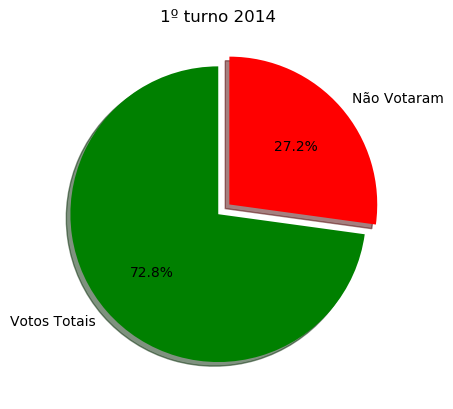

In [34]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = 'Votos Totais', 'Não Votaram'
sizes = [v1, (eleitores-v1)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('1º turno 2014')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)


([<matplotlib.patches.Wedge at 0x200825046c8>,
 [Text(-1.1583989906323062, 0.3132279976343986, 'DILMA'),
  Text(0.5520540167212707, -0.9514391008477164, 'AÉCIO NEVES'),
  Text(0.8562766807125138, 0.6904999971527589, 'MARINA SILVA'),
  Text(0.3111386698471379, 1.7729051661399584, 'LUCIANA GENRO'),
  Text(0.17219667564426994, 1.691256427895268, 'PASTOR EVERALDO'),
  Text(0.06229968392201418, 1.5987866491133886, 'Outros')],
 [Text(-0.6757327445355118, 0.1827163319533992, '41.6%'),
  Text(0.3011203727570568, -0.5189667822805726, '33.5%'),
  Text(0.4670600076613711, 0.37663636208332296, '21.3%'),
  Text(0.22471126155626625, 1.2804315088788587, '1.5%'),
  Text(0.12155059457242583, 1.1938280667496008, '0.8%'),
  Text(0.042831032696384747, 1.0991658212654545, '1.2%')])

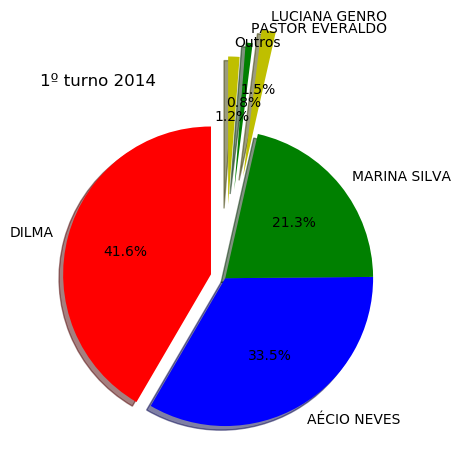

In [35]:
#Grafico de Pizza
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.1, 0.0, 0.0, 0.7, 0.6, 0.5)
colors = ('r', 'b', 'g', 'y', 'g', 'y')

plt.pyplot.title('1º turno 2014', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)


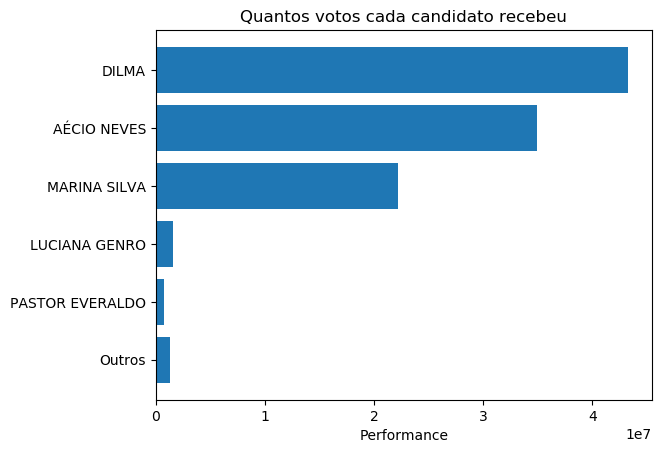

In [36]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

# Segundo Turno

In [37]:
#Escolher Turno
dfpresidente2turno = dfpresidente[dfpresidente.NR_TURNO == 2]
#Grupar por
votostotais2turno = dfpresidente2turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais2turno['Porcentagem'] = votostotais2turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais2turno = votostotais2turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v2 = votostotais2turno.QT_VOTOS_NOMINAIS.sum()

([<matplotlib.patches.Wedge at 0x200abf24e08>,
 [Text(-0.8043197044014709, -0.7503797792528331, 'Votos Totais'),
  Text(0.8774396008863737, 0.8185962049730999, 'Não Votaram')],
 [Text(-0.43871983876443865, -0.4092980614106362, '73.9%'),
  Text(0.5118397671837179, 0.4775144529009749, '26.1%')])

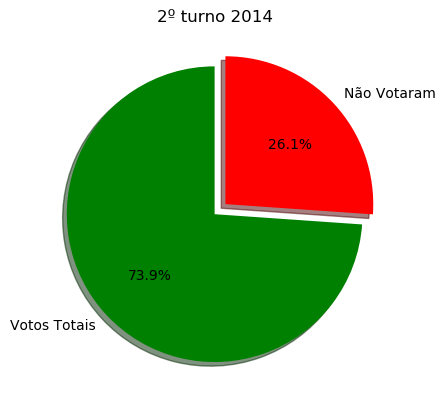

In [38]:
#Grafico de Pizza

labels = 'Votos Totais', 'Não Votaram'
sizes = [v2, (eleitores-v2)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('2º turno 2014')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)

([<matplotlib.patches.Wedge at 0x200be8292c8>,
 [Text(-1.0985418628473944, -0.056619568805993815, 'DILMA'),
  Text(1.1984092933583586, 0.06176702674016327, 'AÉCIO NEVES')],
 [Text(-0.5992046524622151, -0.030883401166905713, '51.6%'),
  Text(0.6990720877923757, 0.03603076559842857, '48.4%')])

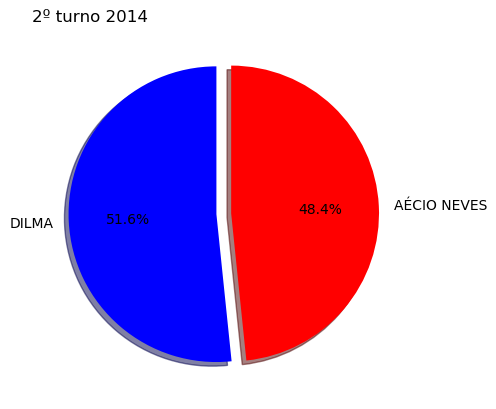

In [39]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1)
colors = ('b','r')

plt.pyplot.title('2º turno 2014', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

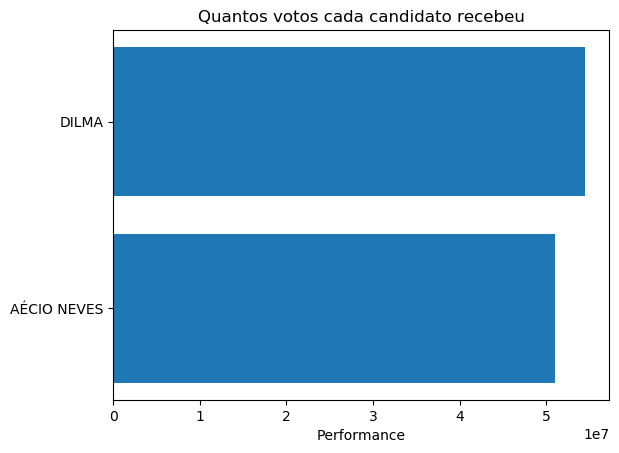

In [40]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [41]:
votostotais2turno = votostotais2turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v2), 
                                              'Porcentagem' : 100-votostotais2turno.Porcentagem.sum() } , ignore_index=True)
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,DILMA,54501118,38.159294
1,PSDB,AÉCIO NEVES,51041155,35.736779
2,Não Votaram,Não Votaram,37283007,26.103927


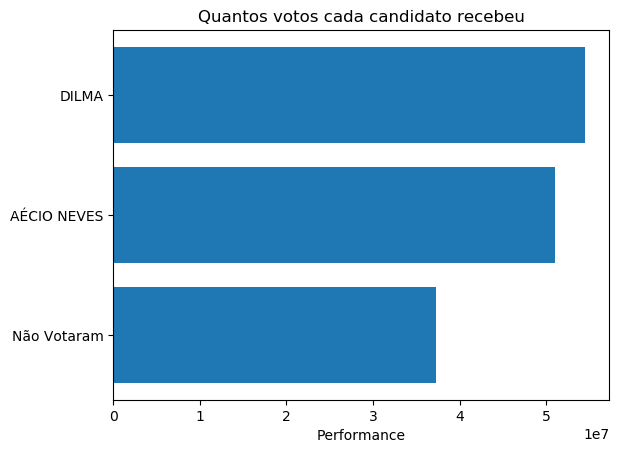

In [42]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x200d01570c8>,
 [Text(-1.0247677973902096, 0.39981365838602656, 'DILMA'),
  Text(0.4436897209810121, -1.114961627813169, 'AÉCIO NEVES'),
  Text(0.8774394476013417, 0.8185963692767348, 'Não Votaram')],
 [Text(-0.5589642531219324, 0.218080177301469, '38.2%'),
  Text(0.25881900390559043, -0.6503942828910152, '35.7%'),
  Text(0.5118396777674493, 0.47751454874476196, '26.1%')])

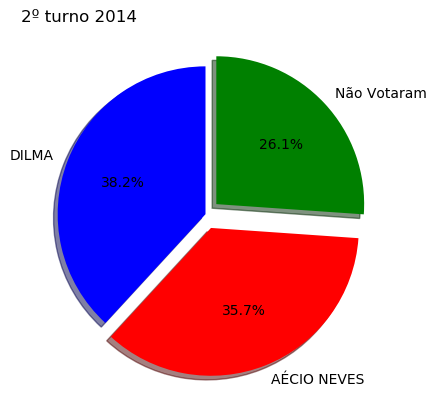

In [43]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1, 0.1)
colors = ('b','r','g')

plt.pyplot.title('2º turno 2014', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

In [44]:
votostotais1turno = votostotais1turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v1), 
                                              'Porcentagem' : 100-votostotais1turno.Porcentagem.sum() } , ignore_index=True)
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,DILMA,43267668,30.294124
1,PSDB,AÉCIO NEVES,34897211,24.433497
2,PSB,MARINA SILVA,22176619,15.527096
3,PSOL,LUCIANA GENRO,1612186,1.128782
4,PSC,PASTOR EVERALDO,780513,0.546481
5,Outros,Outros,1289605,0.902925
6,Não Votaram,Não Votaram,38801478,27.167094


# Salvar os Arquivos CSV

In [45]:
votostotais1turno['Ano'] = 2014
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PT,DILMA,43267668,30.294124,2014
1,PSDB,AÉCIO NEVES,34897211,24.433497,2014
2,PSB,MARINA SILVA,22176619,15.527096,2014
3,PSOL,LUCIANA GENRO,1612186,1.128782,2014
4,PSC,PASTOR EVERALDO,780513,0.546481,2014
5,Outros,Outros,1289605,0.902925,2014
6,Não Votaram,Não Votaram,38801478,27.167094,2014


In [46]:
votostotais1turno.to_csv('1turno_2014.csv')

In [47]:
votostotais2turno['Ano'] = 2014
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PT,DILMA,54501118,38.159294,2014
1,PSDB,AÉCIO NEVES,51041155,35.736779,2014
2,Não Votaram,Não Votaram,37283007,26.103927,2014


In [48]:
votostotais2turno.to_csv('2turno_2014.csv')